In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

METADATA = {'Contributor': 'T. Dunn'}
FSIZE = [5,4]
FDPI = 100
SAVEFIGS = False

In [5]:
def effective_HP_linear(row):
    return row['HP Mean']*(1 + (0.05/0.6)*(row['AC'] - 13))/np.sqrt(0.6)

def effective_DPR_linear(row):
    return row['DPR Mean']*(1 + (0.05/0.6)*(row['AB'] - 3))*np.sqrt(0.6)

def effective_XP_linear(row):
    return 0.25*row['HP Mean']*row['DPR Mean']*(1 + (0.05/0.6)*(row['AC'] + row['AB'] - 16))

def rounds_to_win(row, diff):
    return 3.0 * np.sqrt(row[diff + ' XP']/row['Medium XP'])

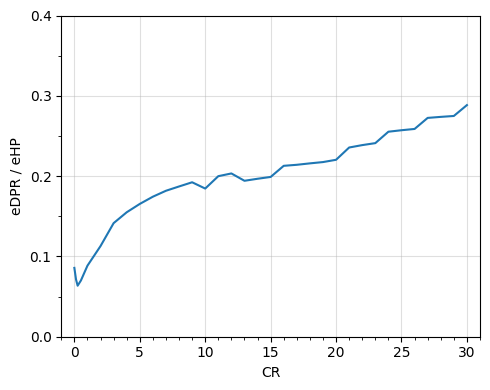

In [3]:
# plots the ratio of a typical monster's effective DPR and effective HP as a function of CR.
dfD0 = pd.read_csv('dmg-targets.csv') # 'CR','XP','HP Mean','AC','DPR Mean','AB'
dfD0['eHP'] = dfD0.apply(lambda row: effective_HP_linear(row), axis=1)
dfD0['eDPR'] = dfD0.apply(lambda row: effective_DPR_linear(row), axis=1)
dfD0['eXP'] = dfD0.apply(lambda row: effective_XP_linear(row), axis=1)

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

ax.plot(dfD0['CR'], dfD0['eDPR']/dfD0['eHP'])

ax.set(xlim=[-1,31], ylim=[0, 0.4], xlabel='CR', ylabel='eDPR / eHP')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.grid(which='major', axis='both', alpha=0.4)

if SAVEFIGS: plt.savefig('./fig-monster-edpr-ehp-ratio-by-cr.svg', metadata=METADATA)

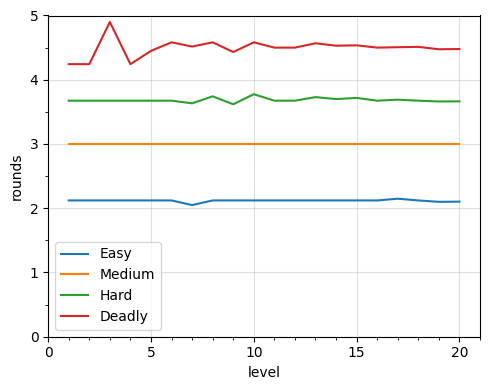

In [6]:
# plots the number of rounds combat is expected to take for encounters at each difficulty threshold as a function of PC level
dfP0 = pd.read_csv('pc-thresholds.csv') # 'Level','Easy XP','Medium XP','Hard XP','Deadly XP','Daily XP'
dfP0['Easy Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Easy'), axis=1)
dfP0['Medium Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Medium'), axis=1)
dfP0['Hard Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Hard'), axis=1)
dfP0['Deadly Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Deadly'), axis=1)

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

for diff in ['Easy', 'Medium', 'Hard', 'Deadly']:
    ax.plot(dfP0['Level'], dfP0['{} Rounds'.format(diff)], label=diff)

ax.set(xlim=[0, 21], ylim=[0,5], xlabel='level', ylabel='rounds')

ax.grid(which='major', axis='both', alpha=0.4)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.legend()

if SAVEFIGS: plt.savefig('./fig-rounds-per-encounter-by-level.svg', metadata=METADATA)

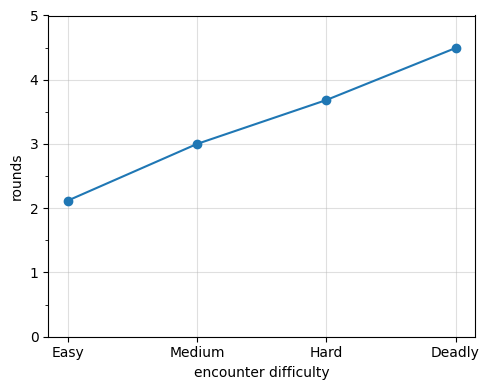

In [66]:
# plots the number of rounds combat is expected to take for encounters at each difficulty threshold
dfP0 = pd.read_csv('pc-thresholds.csv') # 'Level','Easy XP','Medium XP','Hard XP','Deadly XP','Daily XP'
dfP0['Easy Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Easy'), axis=1)
dfP0['Medium Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Medium'), axis=1)
dfP0['Hard Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Hard'), axis=1)
dfP0['Deadly Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Deadly'), axis=1)
dfPG = dfP0.mean()

diffs = ['Easy', 'Medium', 'Hard', 'Deadly']
rounds = [dfPG['Easy Rounds'], dfPG['Medium Rounds'], dfPG['Hard Rounds'], dfPG['Deadly Rounds']]

# save table
df1 = pd.DataFrame(data={'Difficulty': diffs, 'Rounds': rounds})
df1.to_html('./table-rounds-per-encounter.html', index=False, classes='center', float_format='{:,.2f}'.format, border=0)

# plot results
fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

ax.plot(diffs, rounds, '-o')

ax.set(ylim=[0, 5], xlabel='encounter difficulty', ylabel='rounds')

ax.grid(which='major', axis='both', alpha=0.4)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

if SAVEFIGS: plt.savefig('./fig-rounds-per-encounter.svg', metadata=METADATA)

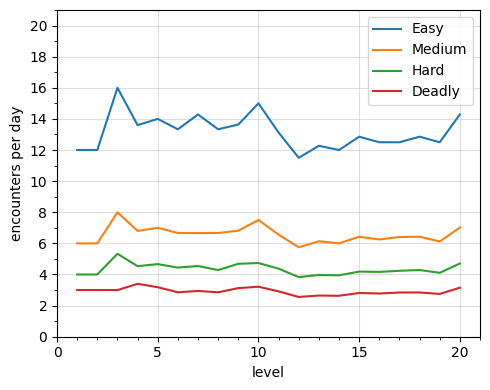

In [70]:
# plots the average number of encounters per full adventuring day for each difficulty threshold as a function of PC level
dfP0 = pd.read_csv('pc-thresholds.csv') # 'Level','Easy XP','Medium XP','Hard XP','Deadly XP','Daily XP'
dfP0['Easy Encounters']   = dfP0['Daily XP']/dfP0['Easy XP']
dfP0['Medium Encounters'] = dfP0['Daily XP']/dfP0['Medium XP']
dfP0['Hard Encounters']   = dfP0['Daily XP']/dfP0['Hard XP']
dfP0['Deadly Encounters'] = dfP0['Daily XP']/dfP0['Deadly XP']

diffs = ['Easy', 'Medium', 'Hard', 'Deadly']

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

for d in diffs:
    ax.plot(dfP0['Level'], dfP0['{} Encounters'.format(d)], label=d)

ax.set(xlim=[0,21], ylim=[0,21], xlabel='level', ylabel='encounters per day')

ax.grid(which='major', axis='both', alpha=0.4)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.legend()

if SAVEFIGS: plt.savefig('./fig-encounters-per-full-adventuring-day-by-level.svg', metadata=METADATA)

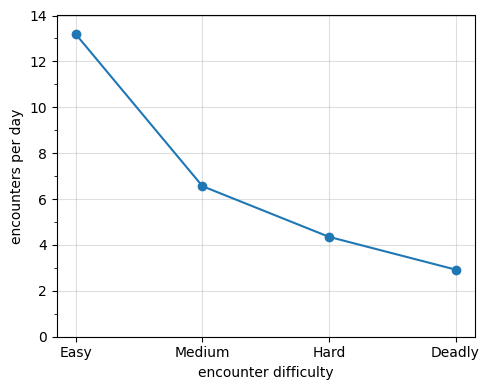

In [68]:
# plots the average number of encounters per full adventuring day for each difficulty threshold
dfP0 = pd.read_csv('pc-thresholds.csv') # 'Level','Easy XP','Medium XP','Hard XP','Deadly XP','Daily XP'
dfP0['Easy Encounters']   = dfP0['Daily XP']/dfP0['Easy XP']
dfP0['Medium Encounters'] = dfP0['Daily XP']/dfP0['Medium XP']
dfP0['Hard Encounters']   = dfP0['Daily XP']/dfP0['Hard XP']
dfP0['Deadly Encounters'] = dfP0['Daily XP']/dfP0['Deadly XP']

dfPG = dfP0.mean()

diffs = ['Easy', 'Medium', 'Hard', 'Deadly']
rounds = [dfPG['Easy Encounters'], dfPG['Medium Encounters'], dfPG['Hard Encounters'], dfPG['Deadly Encounters']]

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

ax.plot(diffs, rounds, '-o')

ax.set(ylim=[0,14], xlabel='encounter difficulty', ylabel='encounters per day')

ax.grid(which='major', axis='both', alpha=0.4)

ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

if SAVEFIGS: plt.savefig('./fig-encounters-per-full-adventuring-day.svg', metadata=METADATA)

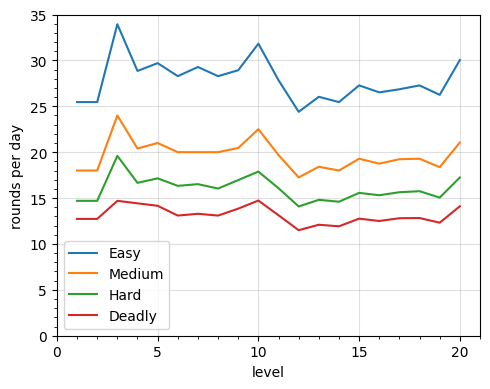

In [63]:
# plots the average number of rounds per full adventuring day for each difficulty threshold as a function of PC level.
dfP0 = pd.read_csv('pc-thresholds.csv') # 'Level','Easy XP','Medium XP','Hard XP','Deadly XP','Daily XP'
dfP0['Easy Encounters']   = dfP0['Daily XP']/dfP0['Easy XP']
dfP0['Medium Encounters'] = dfP0['Daily XP']/dfP0['Medium XP']
dfP0['Hard Encounters']   = dfP0['Daily XP']/dfP0['Hard XP']
dfP0['Deadly Encounters'] = dfP0['Daily XP']/dfP0['Deadly XP']

dfP0['Easy Rounds']   = dfP0.apply(lambda row: rounds_to_win(row, 'Easy'), axis=1)
dfP0['Medium Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Medium'), axis=1)
dfP0['Hard Rounds']   = dfP0.apply(lambda row: rounds_to_win(row, 'Hard'), axis=1)
dfP0['Deadly Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Deadly'), axis=1)

dfP0['Easy Rounds per Day']   = dfP0['Easy Encounters']   * dfP0['Easy Rounds']
dfP0['Medium Rounds per Day'] = dfP0['Medium Encounters'] * dfP0['Medium Rounds']
dfP0['Hard Rounds per Day']   = dfP0['Hard Encounters']   * dfP0['Hard Rounds']
dfP0['Deadly Rounds per Day'] = dfP0['Deadly Encounters'] * dfP0['Deadly Rounds']

# plot results
fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

diffs = ['Easy', 'Medium', 'Hard', 'Deadly']
for d in diffs:
    ax.plot(dfP0['Level'], dfP0['{} Rounds per Day'.format(d)], label=d)

ax.set(xlim=[0,21], ylim=[0,35], xlabel='level', ylabel='rounds per day')

ax.grid(which='major', axis='both', alpha=0.4)

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.legend()

if SAVEFIGS: plt.savefig('./fig-rounds-per-full-adventuring-day-by-level.svg', metadata=METADATA)

# save table
dfPG = dfP0.mean()
df1 = pd.DataFrame(data={
    'Difficulty': ['Easy', 'Medium', 'Hard', 'Deadly'], 
    'Rounds per Encounter': [dfPG['Easy Rounds'], dfPG['Medium Rounds'], dfPG['Hard Rounds'], dfPG['Deadly Rounds']],
    'Encounters per Day': [dfPG['Easy Encounters'], dfPG['Medium Encounters'], dfPG['Hard Encounters'], dfPG['Deadly Encounters']],
    'Rounds per Day': [dfPG['Easy Rounds per Day'], dfPG['Medium Rounds per Day'], dfPG['Hard Rounds per Day'], dfPG['Deadly Rounds per Day']]
})
df1.to_html('./table-rounds-summary.html', index=False, classes='center', float_format='{:,.1f}'.format, border=0, table_id='tab:rounds-summary')

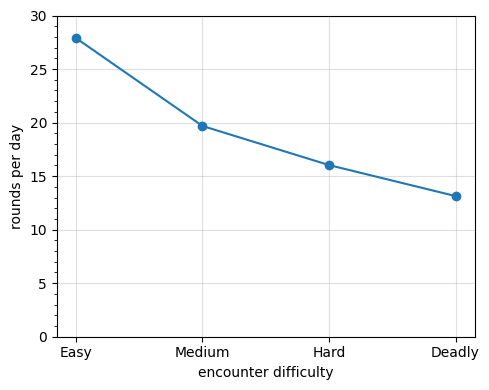

In [71]:
# plots the average number of rounds per full adventuring day for each difficulty threshold
dfP0 = pd.read_csv('pc-thresholds.csv') # 'Level','Easy XP','Medium XP','Hard XP','Deadly XP','Daily XP'
dfP0['Easy Encounters']   = dfP0['Daily XP']/dfP0['Easy XP']
dfP0['Medium Encounters'] = dfP0['Daily XP']/dfP0['Medium XP']
dfP0['Hard Encounters']   = dfP0['Daily XP']/dfP0['Hard XP']
dfP0['Deadly Encounters'] = dfP0['Daily XP']/dfP0['Deadly XP']

dfP0['Easy Rounds']   = dfP0.apply(lambda row: rounds_to_win(row, 'Easy'), axis=1)
dfP0['Medium Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Medium'), axis=1)
dfP0['Hard Rounds']   = dfP0.apply(lambda row: rounds_to_win(row, 'Hard'), axis=1)
dfP0['Deadly Rounds'] = dfP0.apply(lambda row: rounds_to_win(row, 'Deadly'), axis=1)

dfP0['Easy Rounds per Day']   = dfP0['Easy Encounters']   * dfP0['Easy Rounds']
dfP0['Medium Rounds per Day'] = dfP0['Medium Encounters'] * dfP0['Medium Rounds']
dfP0['Hard Rounds per Day']   = dfP0['Hard Encounters']   * dfP0['Hard Rounds']
dfP0['Deadly Rounds per Day'] = dfP0['Deadly Encounters'] * dfP0['Deadly Rounds']

dfPG = dfP0.mean()

diffs = ['Easy', 'Medium', 'Hard', 'Deadly']
rounds = [dfPG['Easy Rounds per Day'], dfPG['Medium Rounds per Day'], dfPG['Hard Rounds per Day'], dfPG['Deadly Rounds per Day']]

fig = plt.figure(figsize=FSIZE, dpi=FDPI, tight_layout=True)
ax = plt.axes()

ax.plot(diffs, rounds, '-o')

ax.set(ylim=[0,30], xlabel='encounter difficulty', ylabel='rounds per day')

ax.grid(which='major', axis='both', alpha=0.4)

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

if SAVEFIGS: plt.savefig('./fig-rounds-per-full-adventuring-day.svg', metadata=METADATA)